### Context

##### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing the data file

In [2]:
import pandas as pd 
FullRaw = pd.read_csv('E:/New folder/diabetes.csv')

In [3]:
FullRaw.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Changing the zero values with median

In [4]:
import numpy as np
FullRaw['Glucose'] = np.where(FullRaw['Glucose']==0,FullRaw['Glucose'].median(),FullRaw['Glucose'])
FullRaw['Insulin'] = np.where(FullRaw['Insulin']==0,FullRaw['Insulin'].median(),FullRaw['Insulin'])
FullRaw['SkinThickness'] = np.where(FullRaw['SkinThickness']==0,FullRaw['SkinThickness'].median(),FullRaw['SkinThickness'])

In [5]:
FullRaw.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74,23.0,30.5,25.6,0.201,30,0
6,3,78.0,50,32.0,88.0,31.0,0.248,26,1
7,10,115.0,0,23.0,30.5,35.3,0.134,29,0
8,2,197.0,70,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96,23.0,30.5,0.0,0.232,54,1


#### Check for missing value

In [6]:
FullRaw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
FullRaw.shape

(768, 9)

In [12]:
FullRaw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Dividing the dependent and independent variables

In [9]:
X = FullRaw.drop('Outcome',axis = 1)
Y = FullRaw['Outcome']

In [10]:
print(X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72           35.0     30.5  33.6   
1            1     85.0             66           29.0     30.5  26.6   
2            8    183.0             64           23.0     30.5  23.3   
3            1     89.0             66           23.0     94.0  28.1   
4            0    137.0             40           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [11]:
print(Y.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


### Feature selection

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [13]:
print(model.feature_importances_)

[0.09914795 0.29865994 0.09413994 0.07124858 0.06408099 0.12983136
 0.10500362 0.13788761]


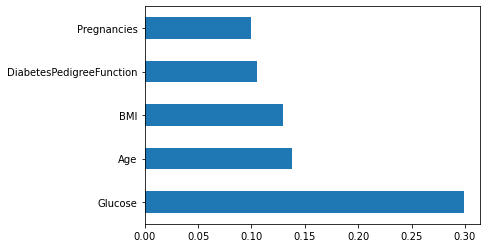

In [14]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')
plt.show()

### Spliting the data into train and test

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=7)

### Model building

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10).fit(X_train,Y_train)
prediction = rf_classifier.predict(X_test) 

In [24]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix','\n',confusion_matrix(Y_test,prediction),'\n')
print('Classification report','\n',classification_report(Y_test,prediction),'\n')
print('Accuracy score','\t',accuracy_score(Y_test,prediction))

Confusion matrix 
 [[90  7]
 [25 32]] 

Classification report 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        97
           1       0.82      0.56      0.67        57

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.80      0.79      0.78       154
 

Accuracy score 	 0.7922077922077922


### Performing hyperparameter tuning

#### Randomized search cv

In [26]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num = 10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,15]
min_samples_leaf = [1,2,4,6,8]
criterion = ['entropy','gini']
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':criterion
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [27]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=7,n_jobs=-1)
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

#### Best parameters

In [28]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'entropy'}

#### Estimator which gave highest score

In [29]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=780, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=1600)

In [30]:
best_random_grid = rf_randomcv.best_estimator_

In [31]:
y_pred = best_random_grid.predict(X_test)
print('Confusion matrix','\n',confusion_matrix(Y_test,y_pred),'\n')
print('Classification report','\n',classification_report(Y_test,y_pred),'\n')
print('Accuracy score','\t',accuracy_score(Y_test,y_pred))

Confusion matrix 
 [[86 11]
 [18 39]] 

Classification report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.78      0.68      0.73        57

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154
 

Accuracy score 	 0.8116883116883117


In [32]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'entropy'}

#### Grid search cv

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'criterion':[rf_randomcv.best_params_['criterion']],
              'max_depth':[rf_randomcv.best_params_['max_depth']],
              'max_features':[rf_randomcv.best_params_['max_features']],
              'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf']-2,
                                  rf_randomcv.best_params_['min_samples_leaf'],
                                  rf_randomcv.best_params_['min_samples_leaf']+2],
              'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-2,
                                 rf_randomcv.best_params_['min_samples_split']-1,
                                 rf_randomcv.best_params_['min_samples_split'],
                                 rf_randomcv.best_params_['min_samples_split']+1,
                                 rf_randomcv.best_params_['min_samples_split']+2],
              'n_estimators':[rf_randomcv.best_params_['n_estimators']-200,
                             rf_randomcv.best_params_['n_estimators']-100,
                             rf_randomcv.best_params_['n_estimators'],
                             rf_randomcv.best_params_['n_estimators']+100,
                             rf_randomcv.best_params_['n_estimators']+200]
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [780], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}


In [35]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [780],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [36]:
best_grid = grid_search.best_estimator_

In [37]:
y_pred = best_grid.predict(X_test)
print('Confusion matrix','\n',confusion_matrix(Y_test,y_pred),'\n')
print('Classification report','\n',classification_report(Y_test,y_pred),'\n')
print('Accuracy score','\t',accuracy_score(Y_test,y_pred))

Confusion matrix 
 [[87 10]
 [19 38]] 

Classification report 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.79      0.67      0.72        57

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154
 

Accuracy score 	 0.8116883116883117
